# Minería de datos
---
- Autor: Mauricio Montes
- Fecha: 29 jun 2025

## KPIs a buscar
- Tasa de retiro por carrera
- Motivo de retiro más frecuente
- Promedio de tiempo antes del retiro
- Distribución de retiros por género
- Cursos más asociados a retiros
- Docentes con más estudiantes retirados (si es relevante)

## Carga de datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**DISCLAIMER: Los datos fueron generados por inteligencia artificial y se nota, por lo que es probable que no se puedan observar correlaciones ya que los datos no son reales. En teoría está basado en el data warehouse del proyecto, un select de la tabla `fact_retiros` relacionado con todos los joins de las tablas dimensionales del modelo. Es lo mejor que se pudo hacer en poco tiempo, pero nuevamente... Son datos muy lejos de lo ideal.**

In [3]:
df = pd.read_csv('../retiros.csv') # carga de datos de retiros
df.head()

,retiro_ID,fecha,year,mes,semestre,estudiante_nombres,estudiante_apellidos,carrera,estudiante_fecha_ingreso,genero,docente_nombres,docente_apellidos,departamento,materia_nombre,uvs,periodo,fecha_inicio,fecha_fin,tipo_retiro,razon_retiro
0,1,2022-01-11,2022,1,1,Juan,Pérez,Informática,2019-08-15,Masculino,Luis Gómez,Informática,Informática,Estructuras de Datos,4,1,2022-01-11,2022-06-04,Temporal,Salud
1,2,2022-01-12,2022,1,1,María,González,Matemática,2020-03-20,Femenino,Ana Ramírez,Matemática,Matemática,Cálculo I,4,1,2022-01-11,2022-06-04,Definitivo,Cambio de carrera
2,3,2022-01-13,2022,1,1,Carlos,Martínez,Física,2018-11-10,Masculino,Ana Ramírez,Matemática,Matemática,Álgebra Lineal,5,1,2022-01-11,2022-06-04,Temporal,Problemas económicos
3,4,2022-01-14,2022,1,1,Laura,Sánchez,Biología,2021-02-05,Femenino,Marco Antonio Coronado,Biología,Biología,Genética,4,1,2022-01-11,2022-06-04,Definitivo,Problemas personales
4,5,2022-01-15,2022,1,1,Pedro,Rodríguez,Química,2020-07-18,Masculino,Gabino Iglesias,Biología,Biología,Genética,4,1,2022-01-11,2022-06-04,Temporal,Salud


## Análisis exploratorio
Se puede observar que el DataFrame consiste en una tabla de 20 columnas y 1332 registros sobre retiros. Hay columnas que consisten en fechas, pero que son considerados de tipo objeto; por lo que será necesario transformarlo. El dataset parece ser limpio en el contexto de que no hay datos nulos en los registros; sin embargo es necesario verificar si hay datos duplicados.

In [4]:
# Información general del Dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   retiro_ID                 1332 non-null   int64 
 1   fecha                     1332 non-null   object
 2   year                      1332 non-null   int64 
 3   mes                       1332 non-null   int64 
 4   semestre                  1332 non-null   int64 
 5   estudiante_nombres        1332 non-null   object
 6   estudiante_apellidos      1332 non-null   object
 7   carrera                   1332 non-null   object
 8   estudiante_fecha_ingreso  1332 non-null   object
 9   genero                    1332 non-null   object
 10  docente_nombres           1332 non-null   object
 11  docente_apellidos         1332 non-null   object
 12  departamento              1332 non-null   object
 13  materia_nombre            1332 non-null   object
 14  uvs                     

Los valores numéricos no tienen mucho sentido aplicarles medidas estadísticas, dado que estos tienen una función categórica; como en el caso de las unidades valorativas de las materias, el periodo del curso, entre otros. Los otros datos numéricos son en referencia de tiempo: meses, años, semestres.

In [5]:
df.describe(include='object')

,fecha,estudiante_nombres,estudiante_apellidos,carrera,estudiante_fecha_ingreso,genero,docente_nombres,docente_apellidos,departamento,materia_nombre,fecha_inicio,fecha_fin,tipo_retiro,razon_retiro
count,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332
unique,586,206,74,6,511,2,7,4,4,11,4,5,2,4
top,2022-01-12,Roberto Carlos,Ortega,Informática,2021-02-14,Masculino,Ana Ramírez,Matemática,Matemática,Genética,2022-01-11,2022-06-04,Temporal,Problemas económicos
freq,5,33,43,232,13,670,447,447,447,436,377,377,672,340


Analizando los datos categóricamente, podemos observar los datos más frecuentes y la cantidad de datos únicos... Puede que lo mejor sea concatenar los nombres y apellidos de los estudiantes y los docentes para observar los datos únicos. Haciedo la unión, vemos que hay 374 estudiantes que han retirado materias; y que hay 7 docentes para las materias que se están dando. Hay seis carreras que figuran en los datos, 4 departamentos y 11 materias...
Los apellidos de los procesores son las materias que dan...

In [6]:
df['estudiante_nombres'] = df['estudiante_nombres'].str.cat(df['estudiante_apellidos'], sep = ' ')
df.drop(columns=['estudiante_apellidos', 'docente_apellidos'], inplace=True)
df.rename(columns={'estudiante_nombres':'estudiante', 'docente_nombres':'docente', 'materia_nombre':'materia'}, inplace=True)

In [7]:
df.describe(include='object')

,fecha,estudiante,carrera,estudiante_fecha_ingreso,genero,docente,departamento,materia,fecha_inicio,fecha_fin,tipo_retiro,razon_retiro
count,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332
unique,586,374,6,511,2,7,4,11,4,5,2,4
top,2022-01-12,Andrés Felipe Mendoza,Informática,2021-02-14,Masculino,Ana Ramírez,Matemática,Genética,2022-01-11,2022-06-04,Temporal,Problemas económicos
freq,5,15,232,13,670,447,447,436,377,377,672,340


La naturaleza del dataset limita los KPIs que se pueden obtener; principalmente porque solo muestra estudiantes retirados. Si se quisiera hacer modelos predictivos, por ejemplo, es necesaria información de estudiantes que se encuentran activos. Por lo tanto, los KPIs serán principalmente análisis estadísticos del dataset.

## Distribución de retiros por materia
Este KPI puede ser útil para identificar qué materia es la que provoca más retiros; y puede que este sea un indicio de lo difícil que sea una carrera.

In [8]:
df['materia'].unique()

array(['Estructuras de Datos', 'Cálculo I', 'Álgebra Lineal', 'Genética',
       'Sociología', 'Bases de Datos', 'Cálculo II', 'Programación Web',
       'Electromagnetismo', 'Física General', 'Física Moderna'],
      dtype=object)

In [9]:
# nuevo subconjunto para KPI
retiros_por_materia = df['materia'].value_counts().reset_index() # para obtener un dataframe
retiros_por_materia

,materia,count
0,Genética,436
1,Sociología,217
2,Álgebra Lineal,123
3,Cálculo I,120
4,Cálculo II,114
5,Estructuras de Datos,80
6,Bases de Datos,77
7,Programación Web,75
8,Física Moderna,31
9,Electromagnetismo,30


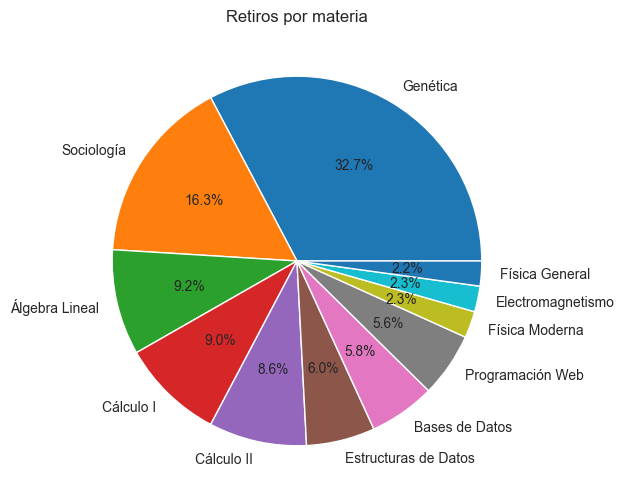

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(retiros_por_materia['count'], labels=retiros_por_materia['materia'], autopct='%1.1f%%')
plt.title('Retiros por materia')
plt.show()

Los retiros por materia no se ven muy bien en un gráfico de pastel, pues son muchas categorías. Vemos que la materia que más se le dificulta a los estudiantes es Genética, que es la única materia del departamento de Biología.

## Motivo de retiro más frecuente
Esto puede servir para entender qué motivos tienen los estudiantes para retirar materia. De los datos dados, hay cuatro tipos de razones por las cuales se retira una materia: Problemas económicos, Salud, Cambios de carrera y Motivos personales.

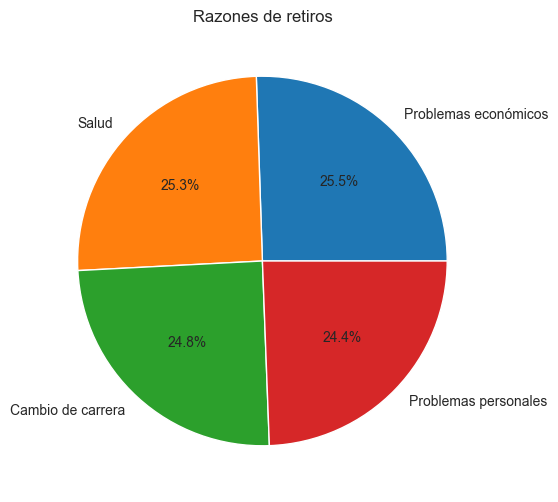

In [11]:
motivos_retiros = df['razon_retiro'].value_counts().reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(motivos_retiros['count'], labels=motivos_retiros['razon_retiro'], autopct='%1.1f%%')
plt.title('Razones de retiros')
plt.show()

¿Qué puedo decir de esto? Eh... Las razones de los retiros están distribuidos uniformemente; no hay una razón que sea más probable que la otra, no por un margen significativo

## Promedio de tiempo antes de retiro definitivo
Este KPI puede ser útil para indicar una tendencia central, determinar cuál es el tiempo promedio que transcurre antes de que un estudiante se retire de la carrera o universidad definitivamente.

In [12]:
# Transformación de datos de fecha para trabajar con fechas...
df['estudiante_fecha_ingreso'] = pd.to_datetime(df['estudiante_fecha_ingreso'])
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
df['fecha_fin'] = pd.to_datetime(df['fecha_fin'])
df['fecha'] = pd.to_datetime(df['fecha'])
df.rename(columns={'estudiante_fecha_ingreso':'fecha_ingreso', 'fecha_inicio':'inicio_periodo', 'fecha_fin':'fin_periodo', 'fecha':'fecha_retiro'}, inplace=True)

In [13]:
retiros_definitivos = df[df['tipo_retiro'] == 'Definitivo'].copy()
retiros_definitivos['tiempo_antes_retiro'] = (retiros_definitivos['fecha_retiro'] - retiros_definitivos['fecha_ingreso']).dt.days
promedio_days = retiros_definitivos['tiempo_antes_retiro'].mean()
promedio_months = promedio_days / 30
promedio_years = promedio_days / 365

print(f"Promedio de días antes de retirarse: {promedio_days:.2f}")
print(f"Promedio de días antes de retirarse: {promedio_months:.2f}")
print(f"Promedio de días antes de retirarse: {promedio_years:.2f}")

Promedio de días antes de retirarse: 1010.10
Promedio de días antes de retirarse: 33.67
Promedio de días antes de retirarse: 2.77


Esta medida podría colocarse en cartas, su promedio en días, meses y años.

## Retiros por mes
Este KPI puede servir para identificar en qué meses es que los estudiantes deciden retirar sus materias.

In [14]:
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

df['nombre_mes'] = df['mes'].apply(lambda x: meses[x-1] if 1 <= x <= 12 else None)

retiros_2022 = df[df['fecha_retiro'].dt.year == 2022].copy()
print(retiros_2022['fecha_retiro'].tail())

retiros_2023 = df[df['fecha_retiro'].dt.year == 2023].copy()
print(retiros_2023['fecha_retiro'].tail())

673   2022-11-24
674   2022-11-25
675   2022-11-26
676   2022-11-27
677   2022-11-28
Name: fecha_retiro, dtype: datetime64[ns]
1327   2023-12-02
1328   2023-11-01
1329   2023-11-02
1330   2023-11-03
1331   2023-11-04
Name: fecha_retiro, dtype: datetime64[ns]


In [15]:
retiros_mes_2022 = retiros_2022['nombre_mes'].value_counts().reset_index()
retiros_mes_2022

,nombre_mes,count
0,enero,90
1,noviembre,88
2,abril,86
3,marzo,77
4,mayo,67
5,agosto,65
6,septiembre,56
7,octubre,49
8,febrero,38
9,julio,37


In [16]:
retiros_mes_2023 = retiros_2023['nombre_mes'].value_counts().reset_index()
retiros_mes_2023

,nombre_mes,count
0,abril,84
1,marzo,77
2,agosto,73
3,septiembre,71
4,noviembre,64
5,mayo,62
6,octubre,60
7,enero,55
8,febrero,51
9,julio,47


In [17]:
retiros_por_mes = pd.merge(retiros_mes_2022, retiros_mes_2023, on='nombre_mes')
retiros_por_mes.rename(columns={'count_x':'retiros_2022', 'count_y':'retiros_2023'}, inplace=True)
retiros_por_mes

,nombre_mes,retiros_2022,retiros_2023
0,enero,90,55
1,noviembre,88,64
2,abril,86,84
3,marzo,77,77
4,mayo,67,62
5,agosto,65,73
6,septiembre,56,71
7,octubre,49,60
8,febrero,38,51
9,julio,37,47


Estos datos de aquí pueden visualizarse por medio de un gráfico de barras doble, o un gráfico de líneas con dos series.

## Distribución de retiros por genero y por carrera
Es posible que haya carreras que se dificultan más a un género que a otro (this feels so wrong). Who knows, puede que sea un punto de partida para un modelo predictivo.

In [18]:
retiros_masculino = df[df['genero'] == 'Masculino'].copy()
retiros_carrera_masculino = retiros_masculino['carrera'].value_counts().reset_index()

retiros_femenino = df[df['genero'] == 'Femenino'].copy()
retiros_carrera_femenino = retiros_femenino['carrera'].value_counts().reset_index()

retiros_genero_carrera = pd.merge(retiros_carrera_masculino, retiros_carrera_femenino, on='carrera')
retiros_genero_carrera.rename(columns={'count_x':'Masculinos', 'count_y':'Femeninos'}, inplace=True)
retiros_genero_carrera

,carrera,Masculinos,Femeninos
0,Informática,214,18
1,Física,204,17
2,Ciencias Sociales,124,93
3,Química,94,122
4,Matemática,17,209
5,Biología,17,203


Nuevamente, este KPI puede representarse en un diagrama de columnas doble, o en una estructura semejante a una pirámide de edad, tal vez.

## Retiros por periodo
Para observar cómo ha evolucionado el número de retiros que se dan por cada periodo.

In [19]:
retiros_periodo = df.copy()
retiros_periodo['periodo_year'] = (retiros_periodo['periodo'].astype(str).str.zfill(2) + '-' + retiros_periodo['year'].astype(str))
retiros_periodo['periodo_year'].value_counts().reset_index()

,periodo_year,count
0,01-2022,377
1,01-2023,335
2,02-2023,319
3,02-2022,301


Puede que la mejor forma de visualizar este KPI sea por medio de un gráfico de líneas... Hubiera sido bueno que los datos se extendieran por más tiempo, pero que se le va a hacer...

## Docentes con más estudiantes retirados
Puede que uno de los causantes de retiros sea la calidad de los profesores. Si un profesor es malo enseñando, o es muy estricto, puede que entonces este tenga asociado un mayor número de estudiantes retirados.

In [20]:
retiros_por_docente = df.groupby(['docente', 'departamento']).size().reset_index(name='cantidad_retiros')
retiros_por_docente

,docente,departamento,cantidad_retiros
0,Ana Ramírez,Matemática,447
1,Gabino Iglesias,Biología,111
2,Gilberto Alcántar,Biología,102
3,Graciela Cervántez,Biología,108
4,Luis Gómez,Informática,232
5,Marco Antonio Coronado,Biología,115
6,Norma Quintero,Ciencias Sociales,217


Un gráfico de barras puede funcionar para este. Podemos observar que Ana Ramírez tiene la mayor cantidad de retiros porque es la docente que enseña más materias; implicando que está sobrecargada por ejemplo.